<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        5941 non-null   object 
 1   GENERAL_DAM_OCCUPANCY_RATE  5941 non-null   float64
 2   GENERAL_DAM_RESERVED_WATER  5941 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.4+ KB
Series([], dtype: int64)
           DATE  GENERAL_DAM_OCCUPANCY_RATE  GENERAL_DAM_RESERVED_WATER
5587 2020-04-19                       80.79                         701
5588 2020-04-19                       70.03                         608
5849 2021-01-07                       19.35                         168
5850 2021-01-07                       19.35                         168
Number of missing dates: 2


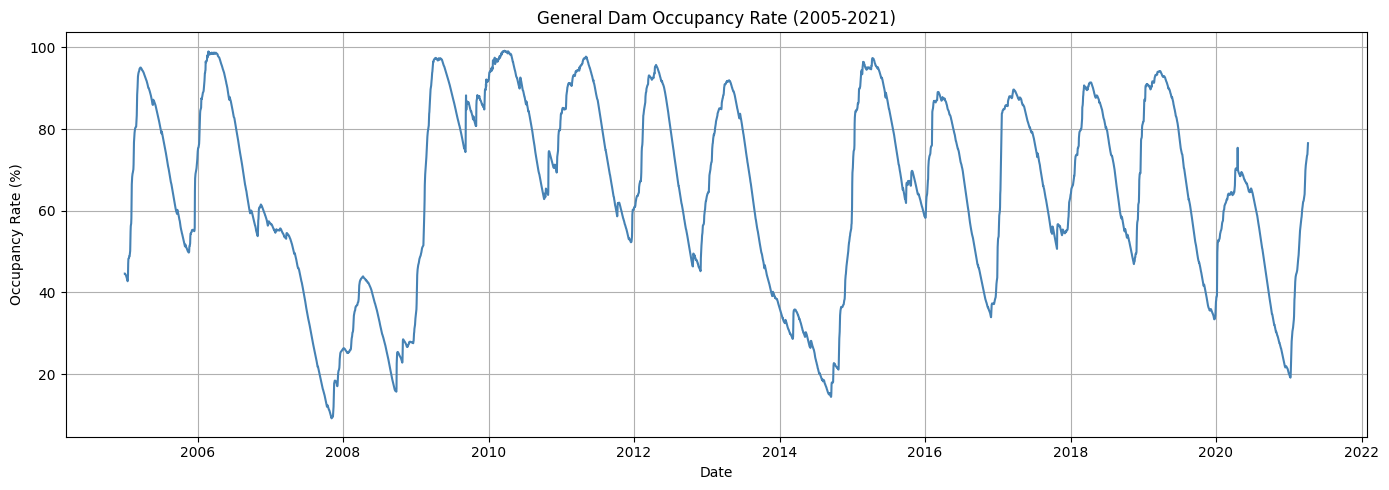

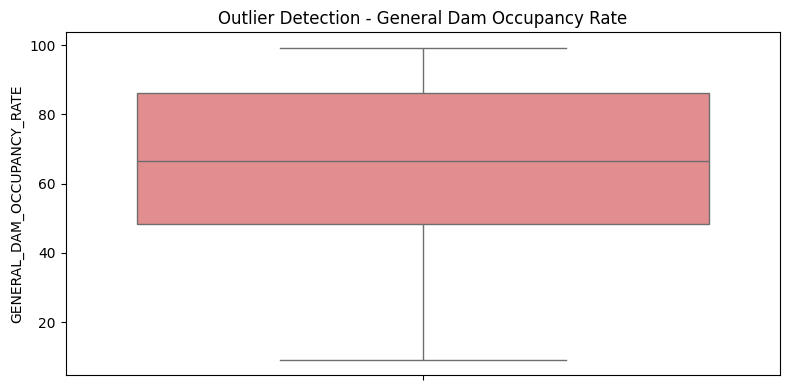

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        5941 non-null   datetime64[ns]
 1   GENERAL_DAM_OCCUPANCY_RATE  5941 non-null   float64       
 2   GENERAL_DAM_RESERVED_WATER  5941 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 139.4 KB


FileNotFoundError: [Errno 2] No such file or directory: './data/processed/istanbul-dams-daily-occupancy-rates-cleaned.csv'

In [8]:
# Importing necessary libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing warnings for cleaner outputs
warnings.filterwarnings('ignore')

# Loading the general dam occupancy dataset
df = pd.read_csv("../data/raw/dam_occupancy.csv")

# Displaying dataset structure and data types
df.info()

# Displaying a preview of the first five records
df.head()

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Filling missing values using linear interpolation if necessary
df['GENERAL_DAM_OCCUPANCY_RATE'] = df['GENERAL_DAM_OCCUPANCY_RATE'].interpolate(method='linear')
df['GENERAL_DAM_RESERVED_WATER'] = df['GENERAL_DAM_RESERVED_WATER'].interpolate(method='linear')

# Converting DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

# Sorting data chronologically and resetting the index
df.sort_values('DATE', inplace=True)
df.reset_index(drop=True, inplace=True)

# Identifying duplicate date entries in the dataset
duplicate_dates = df[df.duplicated(subset=['DATE'], keep=False)]
print(duplicate_dates)

# Resolving duplicates by aggregating values through mean calculation
df = df.groupby('DATE', as_index=False).mean()

# Creating a complete daily date range between min and max dates
full_range = pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='D')

# Identifying and reporting missing dates in the time series
missing_dates = set(full_range) - set(df['DATE'])
print(f"Number of missing dates: {len(missing_dates)}")

# Reindexing the dataset to include missing dates and interpolating values
df = df.set_index('DATE').reindex(full_range).rename_axis('DATE').reset_index()
df['GENERAL_DAM_OCCUPANCY_RATE'] = df['GENERAL_DAM_OCCUPANCY_RATE'].interpolate(method='linear')
df['GENERAL_DAM_RESERVED_WATER'] = df['GENERAL_DAM_RESERVED_WATER'].interpolate(method='linear')

# Plotting the general dam occupancy trend over time
plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['GENERAL_DAM_OCCUPANCY_RATE'], color='steelblue')
plt.title('General Dam Occupancy Rate (2005-2021)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Detecting potential outliers using boxplot visualization
plt.figure(figsize=(8,4))
sns.boxplot(data=df['GENERAL_DAM_OCCUPANCY_RATE'], color='lightcoral')
plt.title('Outlier Detection - General Dam Occupancy Rate')
plt.tight_layout()
plt.show()

# Displaying final dataset structure and summary statistics
df.info()
df.describe()

# Saving the cleaned dataset for modeling purposes
# Corrected path for Streamlit running from web_app/
df = pd.read_csv("./data/processed/istanbul-dams-daily-occupancy-rates-cleaned.csv", parse_dates=['Tarih'], index_col='Tarih')
